![Abdessamd Touzani](banner.png)

In [1]:
import pandas as pd
import numpy as np


# set seed for reproducibility
np.random.seed(0)

print("Checked")

Checked


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
print('Checked...')

Checked...


**[Documentation for used Data](https://www.kaggle.com/datasets/saurograndi/airplane-crashes-since-1908)**

## **Import Data**

In [3]:
df = pd.read_csv('Airplane_Crashes_and_Fatalities_Since_1908_t0_2023.csv', encoding='ISO-8859-1')
print('Data read successfully')

Data read successfully


In [4]:
df.head()

,Date,Time,Location,Operator,Flight #,Route,AC Type,Registration,cn/ln,Aboard,Aboard Passangers,Aboard Crew,Fatalities,Fatalities Passangers,Fatalities Crew,Ground,Summary
0,1908-09-17,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,1.0,1.0,1.0,0.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,1909-09-07,NaN,"Juvisy-sur-Orge, France",NaN,NaN,Air show,Wright Byplane,SC1,NaN,1.0,0.0,1.0,1.0,0.0,0.0,0.0,Eugene Lefebvre was the first pilot to ever be...
2,1912-07-12,6:30,"Atlantic City, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,0.0,5.0,5.0,0.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
3,1913-08-06,NaN,"Victoria, British Columbia, Canada",Private,NaN,NaN,Curtiss seaplane,NaN,NaN,1.0,0.0,1.0,1.0,0.0,1.0,0.0,The first fatal airplane accident in Canada oc...
4,1913-09-09,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,NaN,NaN,14.0,NaN,NaN,0.0,The airship flew into a thunderstorm and encou...


## **I) Data Cleaning:**

### 1) Handle missing values:

In [5]:
print("Data shape: ", df.shape)
df.isnull().sum()

Data shape:  (4998, 17)


Date                        0
Time                     1512
Location                    4
Operator                   10
Flight #                 3669
Route                     777
AC Type                    15
Registration              274
cn/ln                     668
Aboard                     18
Aboard Passangers         229
Aboard Crew               226
Fatalities                  8
Fatalities Passangers     242
Fatalities Crew           241
Ground                     42
Summary                    64
dtype: int64

--> As we can see at first sight,for flight number almost all rows are null, so I will just remove that column.

In [6]:
df.drop(['Flight #'], axis = 1, inplace = True)
df.head(5)

,Date,Time,Location,Operator,Route,AC Type,Registration,cn/ln,Aboard,Aboard Passangers,Aboard Crew,Fatalities,Fatalities Passangers,Fatalities Crew,Ground,Summary
0,1908-09-17,17:18,"Fort Myer, Virginia",Military - U.S. Army,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,1.0,1.0,1.0,0.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,1909-09-07,NaN,"Juvisy-sur-Orge, France",NaN,Air show,Wright Byplane,SC1,NaN,1.0,0.0,1.0,1.0,0.0,0.0,0.0,Eugene Lefebvre was the first pilot to ever be...
2,1912-07-12,6:30,"Atlantic City, New Jersey",Military - U.S. Navy,Test flight,Dirigible,NaN,NaN,5.0,0.0,5.0,5.0,0.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
3,1913-08-06,NaN,"Victoria, British Columbia, Canada",Private,NaN,Curtiss seaplane,NaN,NaN,1.0,0.0,1.0,1.0,0.0,1.0,0.0,The first fatal airplane accident in Canada oc...
4,1913-09-09,18:30,Over the North Sea,Military - German Navy,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,NaN,NaN,14.0,NaN,NaN,0.0,The airship flew into a thunderstorm and encou...


In [7]:
df.shape

(4998, 16)

--> The column is dropped successfuly

Now, I will group data into 2 categories (From IBM Data Science course), continuous attributes that I will replace by the mean, and caategorical aattributes tht I will replace by the most frequence value
- Continuous attributes:
  - Aboard
  - Aboard Passangers
  - Aboard Crew
  - Fatalities
  - Fatalities Passaangers
  - Fatalities Crew
  - Ground
- Categorical attributes:
  - Location
  - Operator
  - Route
  - AC Type
  - Registration
  - cn/ln
  - Summary

- **There is no null values for Date**
- **For the time, at this stage I don't see any use of it in futur analysis, because crashes are not strongly relatable with a specific time of the day, even tho it still can, in seasons like Falls and Winter...**
--
- ***But still can use, depends on analysis progress:***
  - *Forward Fill (ffill()) or Backward Fill (bfill())*
  - *Linear Interpolation*

### *for continuous attributes:*

In [8]:
#Aboard
#Calculate mean of Aboard
aboard_mean = df['Aboard'].mean()
#Replace NaN with the mean - import numpy for it
df['Aboard'].replace(np.NaN, aboard_mean, inplace = True)
print("Aboard null values: ", df['Aboard'].isnull().sum())

Aboard null values:  0


In [9]:
#Aboard Passangers
aboardPassangers_mean = df['Aboard Passangers'].mean()
df['Aboard Passangers'].replace(np.NaN, aboardPassangers_mean, inplace = True)
print("Aboard Passangers null values: ", df['Aboard Passangers'].isnull().sum())

Aboard Passangers null values:  0


In [10]:
#Aboard Crew
aboardCrew_mean = df['Aboard Crew'].mean()
df['Aboard Crew'].replace(np.NaN, aboardCrew_mean, inplace = True)
print("Aboard Crew null values: ", df['Aboard Crew'].isnull().sum())

Aboard Crew null values:  0


In [11]:
#Fatalities
fatalities_mean = df['Fatalities'].mean()
df['Fatalities'].replace(np.NaN, fatalities_mean, inplace = True)
print("Fatalities null values: ", df['Fatalities'].isnull().sum())

Fatalities null values:  0


In [12]:
#Fatalities Passengers
fatalitiesPassangers_mean = df['Fatalities Passangers'].mean()
df['Fatalities Passangers'].replace(np.NaN, fatalitiesPassangers_mean, inplace = True)
print("Fatalities Passangers null values: ", df['Fatalities Passangers'].isnull().sum())

Fatalities Passangers null values:  0


In [13]:
#Fatalities Crew
fatalitiesCrew_mean = df['Fatalities Crew'].mean()
df['Fatalities Crew'].replace(np.NaN, fatalitiesCrew_mean, inplace = True)
print("Fatalities Passangers null values: ", df['Fatalities Crew'].isnull().sum())

Fatalities Passangers null values:  0


In [14]:
#Ground
ground_mean = df['Ground'].mean()
df['Ground'].replace(np.NaN, ground_mean, inplace = True)
print("Ground null values: ", df['Ground'].isnull().sum())

Ground null values:  0


### *for categorical attributes:*

In [15]:
#Location
#Calculate most frequent value
print("Location null values: ", df['Location'].isnull().sum())
location_maxFreq = df['Location'].mode()[0]
#Replace NaN with the mean - import numpy for it
df['Location'].fillna(value=location_maxFreq, inplace=True)
print("Location null values: ", df['Location'].isnull().sum())

Location null values:  4
Location null values:  0


In [16]:
#Operator
print("Operator null values: ", df['Operator'].isnull().sum())
operator_maxFreq = df['Operator'].mode()[0]
df['Operator'].fillna(value=operator_maxFreq, inplace=True)
print("Operator null values: ", df['Operator'].isnull().sum())

Operator null values:  10
Operator null values:  0


In [17]:
#Route
print("Route null values: ", df['Route'].isnull().sum())
route_maxFreq = df['Route'].mode()[0]
print(route_maxFreq)
df['Route'].fillna(value=route_maxFreq, inplace=True)
print("Route null values: ", df['Route'].isnull().sum())

Route null values:  777
Training
Route null values:  0


In [18]:
#AC Type
print("AC Type null values: ", df['AC Type'].isnull().sum())
ACType_maxFreq = df['AC Type'].mode()[0]
print("Frequent value: ",ACType_maxFreq)
df['AC Type'].fillna(value=ACType_maxFreq, inplace=True)
print("AC Type null values: ", df['AC Type'].isnull().sum())

AC Type null values:  15
Frequent value:  Douglas DC-3
AC Type null values:  0


In [19]:
#Registration
print("Registration null values: ", df['Registration'].isnull().sum())
registration_maxFreq = df['Registration'].mode()[0]
print("Frequent value: ",registration_maxFreq)
df['Registration'].fillna(value=registration_maxFreq, inplace=True)
print("Registration null values: ", df['Registration'].isnull().sum())

Registration null values:  274
Frequent value:  19
Registration null values:  0


In [20]:
#cn/ln
print("cn/ln null values: ", df['cn/ln'].isnull().sum())
CnLn_maxFreq = df['cn/ln'].mode()[0]
print("Frequent value: ",CnLn_maxFreq)
df['cn/ln'].fillna(value=CnLn_maxFreq, inplace=True)
print("cn/ln null values: ", df['cn/ln'].isnull().sum())

cn/ln null values:  668
Frequent value:  1
cn/ln null values:  0


In [21]:
df['Summary'].isnull().sum()

64

In [22]:
df['Summary'].mode()[0]

'Crashed under unknown circumstances.'

In [23]:
#Summary
#From previous line, the most frequent value looks better than keeping the null data
print("Summary null values: ", df['Summary'].isnull().sum())
summary_maxFreq = df['Summary'].mode()[0]
print("Frequent value: ",CnLn_maxFreq)
df['Summary'].fillna(value=summary_maxFreq, inplace=True)
print("Summary null values: ", df['Summary'].isnull().sum())

Summary null values:  64
Frequent value:  1
Summary null values:  0


**For the time, aat this stage I don't see any use of it in futur analysis, because crashes are not strogly relatable with a specific time of the day, even tho it still can, in seasons like Falls and Winter...**

### 2) Convert relevant columns to the appropriate data types:

In [24]:
#Let's get the data types of each attribute
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4998 entries, 0 to 4997
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   4998 non-null   object 
 1   Time                   3486 non-null   object 
 2   Location               4998 non-null   object 
 3   Operator               4998 non-null   object 
 4   Route                  4998 non-null   object 
 5   AC Type                4998 non-null   object 
 6   Registration           4998 non-null   object 
 7   cn/ln                  4998 non-null   object 
 8   Aboard                 4998 non-null   float64
 9   Aboard Passangers      4998 non-null   float64
 10  Aboard Crew            4998 non-null   float64
 11  Fatalities             4998 non-null   float64
 12  Fatalities Passangers  4998 non-null   float64
 13  Fatalities Crew        4998 non-null   float64
 14  Ground                 4998 non-null   float64
 15  Summ

Here, for Date and Time I have 2 options:
- Group the 2 columns into one column of data type: datetime.
- Keep them seperated, and convert each one by itself.
As there is some null values in the Time column, so I will go with the second choice.

In [25]:
#Convert Date:
df['Date'] = pd.to_datetime(df['Date'])

In [26]:
#Convert to String
df['Location'] = df['Location'].astype("string")
df['Operator'] = df['Operator'].astype("string")
df['Route'] = df['Route'].astype("string")
df['AC Type'] = df['AC Type'].astype("string")
df['Registration'] = df['Registration'].astype("string")
df['cn/ln'] = df['cn/ln'].astype("string") #In the documentation, cn/ln is a serial number, and they're alphanumeric
df['Summary'] = df['Summary'].astype("string")
#Convert to int64
df['Aboard'] = df['Aboard'].astype('int64')
df['Aboard Passangers'] = df['Aboard Passangers'].astype('int64')
df['Aboard Crew'] = df['Aboard Crew'].astype('int64')
df['Fatalities'] = df['Fatalities'].astype('int64')
df['Fatalities Passangers'] = df['Fatalities Passangers'].astype('int64')
df['Fatalities Crew'] = df['Fatalities Crew'].astype('int64')
df['Ground'] = df['Ground'].astype('int64')
print("Done...")

Done...


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4998 entries, 0 to 4997
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   4998 non-null   datetime64[ns]
 1   Time                   3486 non-null   object        
 2   Location               4998 non-null   string        
 3   Operator               4998 non-null   string        
 4   Route                  4998 non-null   string        
 5   AC Type                4998 non-null   string        
 6   Registration           4998 non-null   string        
 7   cn/ln                  4998 non-null   string        
 8   Aboard                 4998 non-null   int64         
 9   Aboard Passangers      4998 non-null   int64         
 10  Aboard Crew            4998 non-null   int64         
 11  Fatalities             4998 non-null   int64         
 12  Fatalities Passangers  4998 non-null   int64         
 13  Fat

### 3) Check for and handle duplicate entries:

In [28]:
df.duplicated().sum()

0

As we see, there is no duplicated values, so **Data Cleaning** is *done*

## Normalizing Data... (TODO)

## **II) Exploratory Data Analysis (EDA):**

### 1) Distribution of Flight Crashes Over Time:

In [29]:
df.head(2)

,Date,Time,Location,Operator,Route,AC Type,Registration,cn/ln,Aboard,Aboard Passangers,Aboard Crew,Fatalities,Fatalities Passangers,Fatalities Crew,Ground,Summary
0,1908-09-17,17:18,"Fort Myer, Virginia",Military - U.S. Army,Demonstration,Wright Flyer III,19,1,2,1,1,1,1,0,0,"During a demonstration flight, a U.S. Army fly..."
1,1909-09-07,NaN,"Juvisy-sur-Orge, France",Aeroflot,Air show,Wright Byplane,SC1,1,1,0,1,1,0,0,0,Eugene Lefebvre was the first pilot to ever be...


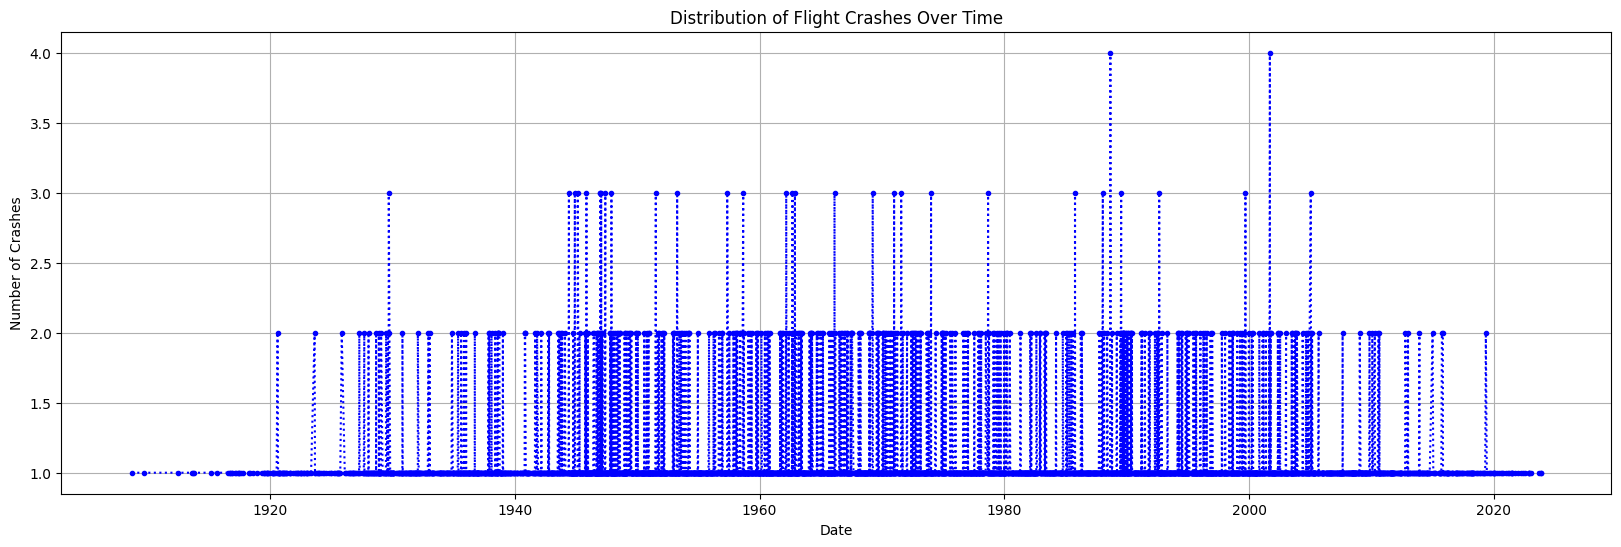

In [30]:
daily_crash_counts = df.groupby(df['Date'].dt.date).size().reset_index(name='Crash Count')
plt.figure(figsize=(20, 6))
plt.plot(daily_crash_counts['Date'], daily_crash_counts['Crash Count'], marker='.', linestyle='dotted', color='blue')
plt.title('Distribution of Flight Crashes Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Crashes')
plt.grid(True)
plt.show()

As we can see, for most years, there was 2 crashes in average.

In [31]:
df.head(2)

,Date,Time,Location,Operator,Route,AC Type,Registration,cn/ln,Aboard,Aboard Passangers,Aboard Crew,Fatalities,Fatalities Passangers,Fatalities Crew,Ground,Summary
0,1908-09-17,17:18,"Fort Myer, Virginia",Military - U.S. Army,Demonstration,Wright Flyer III,19,1,2,1,1,1,1,0,0,"During a demonstration flight, a U.S. Army fly..."
1,1909-09-07,NaN,"Juvisy-sur-Orge, France",Aeroflot,Air show,Wright Byplane,SC1,1,1,0,1,1,0,0,0,Eugene Lefebvre was the first pilot to ever be...


### 2) Analyze factors such as location, airline, aircraft type, and time of the year :

In [32]:
df.head(2)

,Date,Time,Location,Operator,Route,AC Type,Registration,cn/ln,Aboard,Aboard Passangers,Aboard Crew,Fatalities,Fatalities Passangers,Fatalities Crew,Ground,Summary
0,1908-09-17,17:18,"Fort Myer, Virginia",Military - U.S. Army,Demonstration,Wright Flyer III,19,1,2,1,1,1,1,0,0,"During a demonstration flight, a U.S. Army fly..."
1,1909-09-07,NaN,"Juvisy-sur-Orge, France",Aeroflot,Air show,Wright Byplane,SC1,1,1,0,1,1,0,0,0,Eugene Lefebvre was the first pilot to ever be...


Let's produce an area plot showing top 5 regions where crashes happens, so we will look for most 5 frequent locations in the dataframe.

In [33]:
#The most frequent one!
df['Location'].value_counts().idxmax()

'Moscow, Russia'

In [86]:
#MOst 5 common locaions
top_5_locations_df = df['Location'].value_counts().head(5).reset_index()
top_5_locations_df

,Location,count
0,"Moscow, Russia",21
1,"Manila, Philippines",15
2,"New York, New York",14
3,"Cairo, Egypt",13
4,"Sao Paulo, Brazil",13


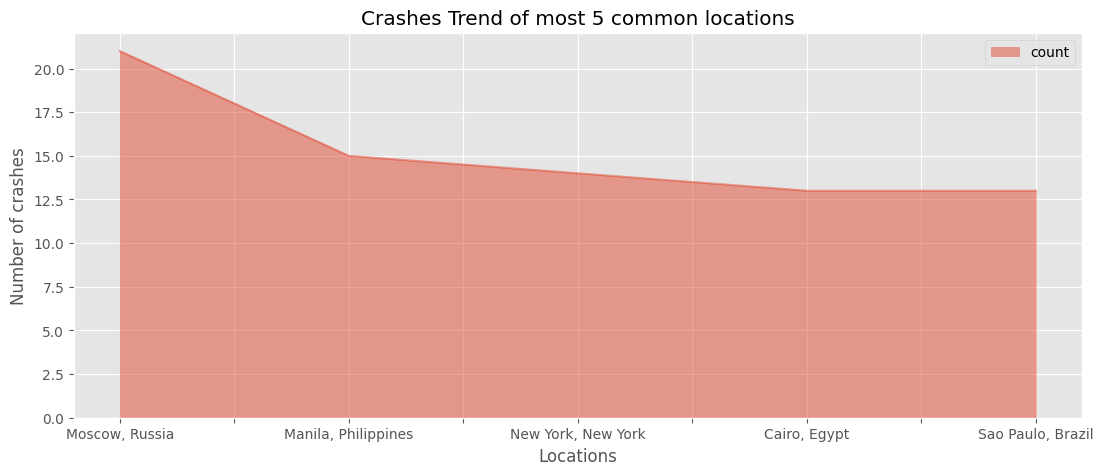

In [92]:
#top_5_locations_df.index = top_5_locations_df.index.map(int)
top_5_locations_df.plot(kind='area',
                        x='Location',
    stacked=False,
    figsize=(13, 5)
)
plt.title('Crashes Trend of most 5 common locations')
plt.xlabel('Locations')
plt.ylabel('Number of crashes')
plt.show()

In [93]:
#same for AC Type
top5_AcType = df['AC Type'].value_counts().head(5).reset_index()
top5_AcType

,AC Type,count
0,Douglas DC-3,348
1,de Havilland Canada DHC-6 Twin Otter 300,82
2,Douglas C-47A,70
3,Douglas C-47,64
4,Douglas DC-4,38


Is there any relation between AC Type and the location/region?

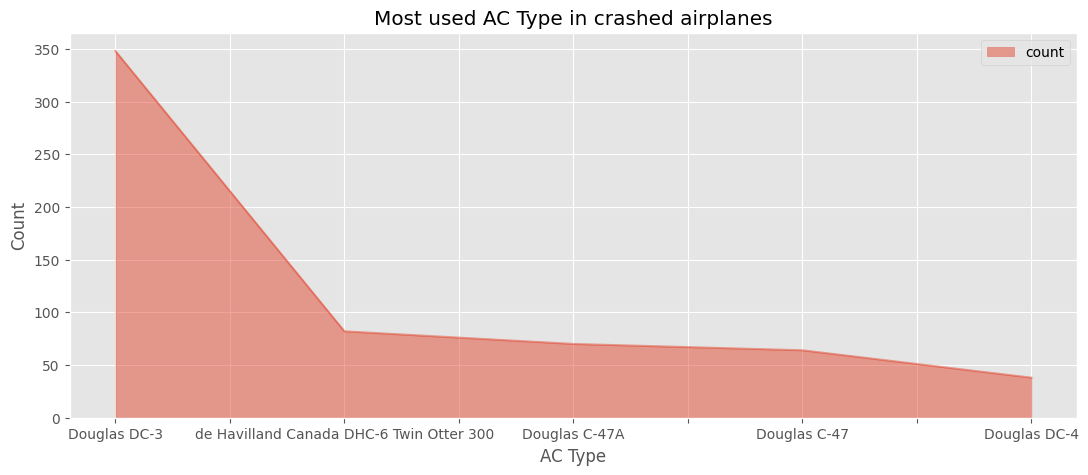

In [106]:
#top_5_locations_df.index = top_5_locations_df.index.map(int)
top5_AcType.plot(kind='area',
                        x='AC Type',
    stacked=False,
    figsize=(13, 5)
)
plt.title('Most used AC Type in crashed airplanes')
plt.xlabel('AC Type')
plt.ylabel('Count')
plt.show()

### 3) Investigate correlations between different variables:

In [108]:
#Aboard and Fatalities
df['Aboard'].corr(df['Fatalities'])

0.7399683472186251

So, as we see there is strong correlation between Aboard and Ftalities

In [107]:
df.head(2)

,Date,Time,Location,Operator,Route,AC Type,Registration,cn/ln,Aboard,Aboard Passangers,Aboard Crew,Fatalities,Fatalities Passangers,Fatalities Crew,Ground,Summary
0,1908-09-17,17:18,<NA>,Military - U.S. Army,Demonstration,<NA>,19,1,2,1,1,1,1,0,0,"During a demonstration flight, a U.S. Army fly..."
1,1909-09-07,NaN,<NA>,Aeroflot,Air show,<NA>,SC1,1,1,0,1,1,0,0,0,Eugene Lefebvre was the first pilot to ever be...


## **By: [Abdessamad Touzani](https://www.linkedin.com/in/abdessamadtouzani/)**